### Import Necessary Modules

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

### Loading The Dataset

In [150]:
# Load taining and validation dataset
train = pd.read_csv('../data/twitter_training.csv', encoding='ISO-8859-1')
val = pd.read_csv('../data/twitter_validation.csv', encoding='ISO-8859-1')

train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### Data Visualization

In [151]:
# Rename important columns
train = train.iloc[:, 2:]
train.columns = ['label', 'text']

val = val.iloc[:, 2:]
val.columns = ['label', 'text']

train.head()

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [152]:
train.label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [153]:
train.isna().sum()

label      0
text     686
dtype: int64

In [154]:
train = train.dropna()

<Axes: xlabel='label'>

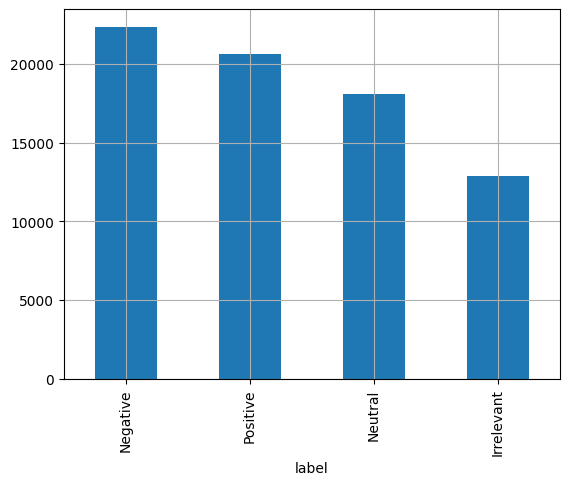

In [155]:
train.label.value_counts().plot(kind = 'bar', grid = True)

<Axes: xlabel='label'>

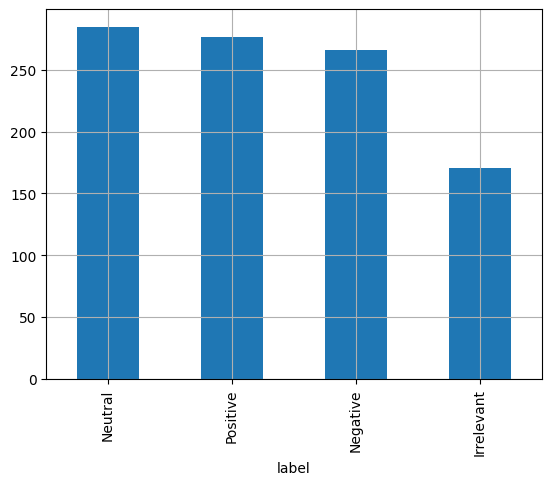

In [156]:
val.label.value_counts().plot(kind = 'bar', grid = True)

### Data Preprocessing

In [157]:
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocess_text function to the text column (save one other df for re-testing)
train_with_stop = train['text']
train_with_stop = val['text']

train['text'] = train['text'].apply(preprocess_text)
val['text'] = val['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\misyel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
train.head(20)

,label,text
0,Positive,"coming borders kill all,"
1,Positive,"im getting borderlands kill all,"
2,Positive,"im coming borderlands murder all,"
3,Positive,"im getting borderlands 2 murder all,"
4,Positive,"im getting borderlands murder all,"
5,Positive,spent hours making something fun. . . know hug...
6,Positive,spent couple hours something fun... know i'm h...
7,Positive,spent hours something fun... know i'm huge @ b...
8,Positive,spent hours making something fun. . . know hug...
9,Positive,2010 spent hours making something fun. . . kno...


In [161]:
train = train.dropna()
val = val.dropna()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '